### CNN on MNIST with keras

#### Import libraries and modules

In [1]:
import numpy as np

# Fix random seed for reproducibility
np.random.seed(123) 

Keras model module

    Import the Sequential model type from Keras. This is simply a linear stack of neural network layers

Importing keras and checking the background for Keras

In [2]:
from keras import backend as back
back.backend()

Using Theano backend.


u'theano'

In [3]:
from keras.models import Sequential

Keras core layers
    
    Import the "core" layers from Keras to use in the Neural Network:

In [4]:
from keras.layers import Dense, Dropout, Activation, Flatten

Keras CNN layers

     Import the CNN layers from Keras. These are the convolutional layers that will help us efficiently train 
     on image data:

In [5]:
from keras.layers import Convolution2D, MaxPooling2D

Utilities

    import some utilities. This will help us transform our data later:

In [6]:
from keras.utils import np_utils

 Load image data from MNIST.

In [7]:
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Look at the shape of the dataset:

In [9]:
print X_train.shape,X_test.shapefrom matplotlib import pyplot as plt
plt.imshow(X_train[0])

(60000L, 28L, 28L) (10000L, 28L, 28L)


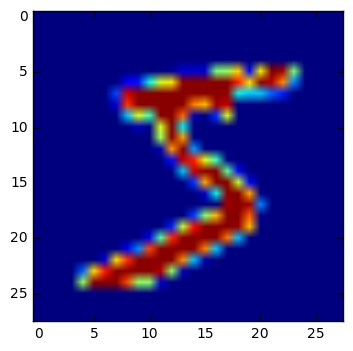

In [11]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])
plt.show()

#### Preprocess input data for Keras

Reshape input data

    When using the Theano backend, you must explicitly declare a dimension for the depth of the input image. 
    E.g. a full-color image with all 3 RGB channels will have a depth of 3.

    Our MNIST images only have a depth of 1, but we must explicitly declare that. 

    In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height).

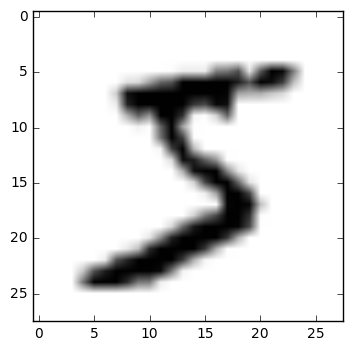

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
X_temp = X_train.reshape(X_train.shape[0],1,28, 28)
plt.imshow(X_temp[0][0], cmap=cm.binary)
plt.show()

In [13]:
X_train = X_train.reshape(X_train.shape[0],28, 28,1)
X_test = X_test.reshape(X_test.shape[0],28, 28,1)

 print X_train's dimensions

In [14]:
print X_train.shape

(60000L, 28L, 28L, 1L)


Convert our data type to float32 and normalize our data values to the range [0, 1]

In [15]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

#### Preprocess class labels for Keras

Look at the shape of our class label data

We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.

In [16]:
print y_train

[5 0 4 ..., 5 6 8]


Convert 1-dimensional class arrays to 10-dimensional class matrices

In [17]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Take another look:

In [18]:
print Y_train.shape

(60000L, 10L)


#### Define model architecture.

Declaring a sequential model

In [19]:
model = Sequential()

Declare the input layer

CNN input layer

In [20]:
model.add(Convolution2D(filters=64,kernel_size=[2,2],strides= 1, activation='relu', input_shape=(28,28,1)))

The input shape parameter should be the shape of 1 sample. 

    In this case, it is ( 28, 28,1) that corresponds to  the (width, height,depth) of each digit image.

First 3 parameters correspond to

    the number of convolution filters to use, 
    the number of rows in each convolution kernel, and 
    the number of columns in each convolution kernel, respectively.

*Note: The step size is (1,1) by default, and it can be tuned using the 'subsample' parameter.

Add more layers to our model

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

Dropout

    This is a method for regularizing our model in order to prevent overfitting. 

MaxPooling2D 

    Is a way to reduce the number of parameters in our model by sliding a 2x2 pooling filter across 
    the previous layer and taking the max of the 4 values in the 2x2 filter.

So far, for model parameters, we've added two Convolution layers. To complete our model architecture, let's add a fully connected layer and then the output layer

In [22]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

For Dense layers, the first parameter is the output size of the layer. Keras automatically handles the connections between layers.

Note that the final layer has an output size of 10, corresponding to the 10 classes of digits.

Also note that the weights from the Convolution layers must be flattened (made 1-dimensional) before passing them to the fully connected Dense layer.

#### Compile model

Compile the model by providing the loss function and the optimizer 

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Fit model on training data.

In [24]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=5, verbose=1)

C:\Users\sid\Anaconda2\lib\site-packages\keras\models.py:826: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
60000/60000 [==============================] - 170s - loss: 0.2832 - acc: 0.9149   
Epoch 2/5
60000/60000 [==============================] - 181s - loss: 0.1284 - acc: 0.9614   
Epoch 3/5
60000/60000 [==============================] - 180s - loss: 0.1033 - acc: 0.9686   
Epoch 4/5
60000/60000 [==============================] - 178s - loss: 0.0903 - acc: 0.9719   
Epoch 5/5
60000/60000 [==============================] - 190s - loss: 0.0797 - acc: 0.9746   


#### Evaluate model on test data.

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [26]:
score

[0.047581311279220974, 0.9849]

Reference: https://elitedatascience.com/keras-tutorial-deep-learning-in-python